# Проверка статистических гипотез

## Задача 1

$X_1, \ldots, X_n$ - выборка из распределения $\mathcal{N}(a_1 , \sigma^2)$,  $Y_1, \ldots, Y_m$ - выборка из распределения $\mathcal{N}(a_2, \sigma^2)$, а $Z_1, \ldots, Z_k$ - выборка из распределения $\mathcal{N}(a_3, \sigma^2)$. Постройте $F$-критерий размера $\alpha$ для проверки гипотезы $H_0: a_1 = a_2$ и $a_1 + a_2 = a_3$ при неизвестном $\sigma^2$.

Протестируйте построенный вами критерий. Рассмотрите $\sigma^2 = 1$. 

Рассмотрите три установки с различными значениями $a_i$ на ваш вкус:

- когда гипотеза выполняется,

- когда гипотеза "почти" выполняется,

- когда гипотеза не выполняется.

a) _(10 баллов)_ Зафиксируйте значения $n = 100$, $m = 150$, $k = 300$. Для каждого эксперимента численно определите минимальный размер критерия, при котором гипотеза $H_0$ отвергается. Визуализируйте соответствующие квантили на графике распределения Фишера. В этом задании вам может помочь обратная функция распределения, реализованная в __scipy.stats__.

б) _(5 баллов)_ Положите $n = m = k = N$, где $N$ изменяется в промежутке от $1$ до $1000$. Для каждого из трёх экспериментов постройте график $\alpha(N)$, где $\alpha(N)$ - минимальный размер критерия, при котором гипотеза $H_0$ отвергается. _В этой задаче можно использовать цикл по $N$._

Матрицы для проверки критерия можно посчитать численно. Не забудьте описать алгоритмы вычислений и сделать выводы.

### Теоретическая часть

$F$-критерий для проверки гипотезы $H_{0}: \; T \theta = \tau$  имеет вид
$$ S = \{ F_{T} > u_{1 - \alpha} \}, $$
где 
$$ F_{T} = \frac{(T\widehat{\theta} - \tau)^{T}(T(Z^{T}Z)^{-1}T^{T})^{-1}(T\widehat{\theta} - \tau)}{\| W - Z\widehat{\theta}\ \|^{2}} \cdot \frac{n - k}{m}, $$
$u_{1 - \alpha}$ - $(1 - \alpha)$-квантиль распределения Фишера $F_{m, \: n - k}$. 

В рамках данной задачи $\theta = (a_{1}, a_{2}, a_{3})^{T}; \; \tau = (0, 0)^{T}; \; W = (X_{1}, \ldots, X_{n}, Y_{1}, \ldots, Y_{m}, Z_{1}, \ldots, Z_{k})^{T}, \; \widehat{\theta} = (Z^{T}Z)^{-1}Z^{T}W$.

Матрицы $T$ и $Z$ имеют следующий вид:
$$ T = \pmatrix{1 & -1 & 0 \\ 1 & 1 & -1},$$ 
$$
\begin{equation*}
  Z = \begin{array}{c@{\!\!\!}l}
  \left( \begin{array}[c]{ccc}
    1 & 0 & 0 \\
    \vdots & \vdots & \vdots \\
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    \vdots & \vdots & \vdots \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
    \vdots & \vdots & \vdots \\
    0 & 0 & 1 \\
  \end{array}  \right)
  &
  \begin{array}[c]{@{}l@{\,}l}
   \left. \begin{array}{c} \vphantom{0}  \\ \vphantom{\vdots}
   \\ \vphantom{0} \end{array} \right\} & \text{$n$} \\
   \left. \begin{array}{c} \vphantom{0} \\ \vphantom{\vdots}
   \\ \vphantom{0}  \end{array} \right\} & \text{$m$} \\
   \left. \begin{array}{c} \vphantom{0}
   \\ \vphantom{\vdots} \\ \vphantom{0} \end{array} \right\} & \text{$k$} \\
   \end{array}
   \end{array}
\end{equation*}.$$

### Решение задачи

In [1]:
#импортируем необходимые модули
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
#задаем параметры распределений: a_i и sigma_2 (дисперсия)
a_params = np.array([[2., 2., 4.], [3., 3., 6.3], [2., 2., 7.]])
sigma_2 = 1.

In [3]:
#функция для создания матрицы Z из критерия
def make_Z_matrix(sizes):
    Z = np.zeros((sizes[0] + sizes[1] + sizes[2], 3))

    for i in range(sizes[0]):
        Z[i][0] = 1

    for i in range(sizes[0], sizes[0] + sizes[1]):
        Z[i][1] = 1

    for i in range(sizes[0] + sizes[1], sizes[0] + sizes[1] + sizes[2]):
        Z[i][2] = 1
    
    return Z

In [4]:
#функция для генерации выборок с заданными параметрами для трех случаев из условия
def generate_samples(sizes):
    X_samples = np.zeros((3, sizes[0]))
    Y_samples = np.zeros((3, sizes[1]))
    Z_samples = np.zeros((3, sizes[2]))

    for i in range(3):
        X_samples[i] = sts.norm.rvs(loc = a_params[i][0], scale = sigma_2, size = sizes[0])
        Y_samples[i] = sts.norm.rvs(loc = a_params[i][1], scale = sigma_2, size = sizes[1])
        Z_samples[i] = sts.norm.rvs(loc = a_params[i][2], scale = sigma_2, size = sizes[2])
    
    return X_samples, Y_samples, Z_samples

In [5]:
#функция для создания вектора W из критерия
def make_W_vector(X_samples, Y_samples, Z_samples):
    W = np.array([np.hstack((X_samples[0], Y_samples[0], Z_samples[0]))])

    for i in range(1, 3):
        W = np.append(W, [np.hstack((X_samples[i], Y_samples[i], Z_samples[i]))], axis = 0)
    
    return W

In [6]:
#функция для подсчета левой части в F-критерии

def find_F_T(T, Z, W, sizes):
    #находим оптимальную оценку по методу наименьших квадратов
    theta_hat = np.linalg.inv(np.dot(Z.transpose(), Z)).dot(Z.transpose()).dot(W)
    
    #находим числитель в левой части критерия
    numerator = T.dot(theta_hat).transpose().dot(np.linalg.inv(T.dot(np.linalg.inv(np.dot(Z.transpose(), Z))).dot(T.transpose()))).dot(T.dot(theta_hat))
    
    #находим знаменатель в левой части критерия
    denominator = np.linalg.norm(W - Z.dot(theta_hat)) ** 2
    
    return (sizes[0] + sizes[1] + sizes[2] - 3) / 2 * numerator / denominator

In [7]:
#создаем матрицу T из условия
T = np.array([[1, -1, 0], [1, 1, -1]])

In [8]:
#задаем размеры выборок
sizes = np.array([400, 400, 300])

#генерируем матрицу Z, выборки и вектор W
Z = make_Z_matrix(sizes)
X_samples, Y_samples, Z_samples = generate_samples(sizes)
W = make_W_vector(X_samples, Y_samples, Z_samples)

In [9]:
#зададим параметр alpha и посчитаем необходимую квантиль распределения Фишера
alpha = 0.05
fisher_quantile = sts.f.ppf(1 - alpha, 2, sizes[0] + sizes[1] + sizes[2] - 3)

In [10]:
print('Квантиль распределения Фишера при alpha = {} равна {}'.format(alpha, fisher_quantile))
print('При выполненной гипотезе (первая установка) левая часть F-критерия: {}'.format(find_F_T(T, Z, W[0], sizes)))
print('При почти выполненной гипотезе (вторая установка) левая часть F-критерия: {}'.format(find_F_T(T, Z, W[1], sizes)))
print('При невыполненной гипотезе (третья установка) левая часть F-критерия: {}'.format(find_F_T(T, Z, W[2], sizes)))

Квантиль распределения Фишера при alpha = 0.05 равна 3.00392805537
При выполненной гипотезе (первая установка) левая часть F-критерия: 1.61793634398
При почти выполненной гипотезе (вторая установка) левая часть F-критерия: 6.32871642539
При невыполненной гипотезе (третья установка) левая часть F-критерия: 462.360697676


Тогда получаем, что в первом эксперименте, согласно $F$-критерию, гипотеза $H_{0}$ не отвергается, а во втором и третьем эксперименте она отвергается. Такой результат согласуется с самой постановкой экспериментов. При этом видно, что при почти выполненной гипотезе значение левой части намного ближе к значению квантили распределения Фишера, чем при невыполненной гипотезе.

Зафиксируем значения $n = 100$, $m = 150$, $k = 300$. Для каждого эксперимента численно определим минимальный размер критерия, при котором гипотеза $H_0$ отвергается.

In [11]:
#фиксируем размеры выборок и создаем матрицу Z, выборки и вектор W
sizes = np.array([100, 150, 300])

Z = make_Z_matrix(sizes)
X_samples, Y_samples, Z_samples = generate_samples(sizes)
W = make_W_vector(X_samples, Y_samples, Z_samples)

In [12]:
#находим левые части из критерия
F_1 = find_F_T(T, Z, W[0], sizes)
F_2 = find_F_T(T, Z, W[1], sizes)
F_3 = find_F_T(T, Z, W[2], sizes)

print('При выполненной гипотезе (первая установка) левая часть F-критерия: {}'.format(F_1))
print('При почти выполненной гипотезе (вторая установка) левая часть F-критерия: {}'.format(F_2))
print('При невыполненной гипотезе (третья установка) левая часть F-критерия: {}'.format(F_3))

При выполненной гипотезе (первая установка) левая часть F-критерия: 0.00184697343368
При почти выполненной гипотезе (вторая установка) левая часть F-критерия: 5.23858823916
При невыполненной гипотезе (третья установка) левая часть F-критерия: 268.940617727


In [13]:
#находим минимальный уровень значимости, при котором отвергается гипотеза
alphas = np.linspace(1e-7, 0.999999, 10000)
quantiles = sts.f.ppf(1 - alphas, 2, sizes[0] + sizes[1] + sizes[2] - 3)
min_index_1 = np.argwhere(F_1 > quantiles)[0][0]
min_index_2 = np.argwhere(F_2 > quantiles)[0][0]
min_index_3 = np.argwhere(F_3 > quantiles)[0][0]

print('Минимальный уровень значимости, при котором гипотеза отвергается в первом эксперименте, равен {}'.format(alphas[min_index_1]))
print('Минимальный уровень значимости, при котором гипотеза отвергается во втором эксперименте, равен {}'.format(alphas[min_index_2]))
print('Минимальный уровень значимости, при котором гипотеза отвергается в третьем эксперименте, равен {}'.format(alphas[min_index_3]))

Минимальный уровень значимости, при котором гипотеза отвергается в первом эксперименте, равен 0.998198821962
Минимальный уровень значимости, при котором гипотеза отвергается во втором эксперименте, равен 0.00560065389539
Минимальный уровень значимости, при котором гипотеза отвергается в третьем эксперименте, равен 1e-07


Видно, что минимальный уровень значимости, при котором отвергается гипотеза в третьем эксперименте, равен минимальному значению $\alpha$ из диапазона значений, потому что условие $F$-критерия выполнимо всегда, вне зависимости от квантили распределения. Поэтому на графике распределения Фишера ниже просто отметим для этого случая точку, которая соответствуется посчитанной левой части в $F$-критерии.

In [14]:
length = int(F_3) + 20
x = np.linspace(0, length, length)
cdf = sts.f.cdf(x, 2, sizes[0] + sizes[1] + sizes[2] - 3)
quantile_1 = quantiles[min_index_1]
quantile_2 = quantiles[min_index_2]

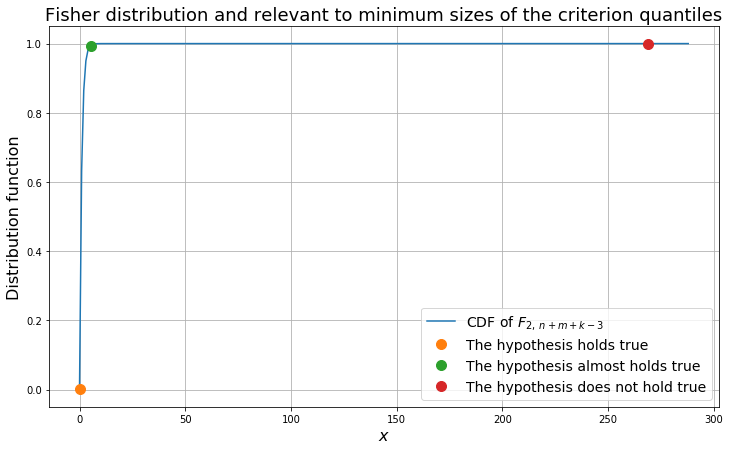

In [15]:
plt.figure(figsize = (12, 7))
plt.plot(x, cdf, label = r'CDF of $F_{2, \; n + m + k - 3}$')
plt.plot([quantile_1], [sts.f.cdf(quantile_1, 2, sizes[0] + sizes[1] + sizes[2] - 3)], linestyle = 'none', marker = 'o', markersize = '10', label = 'The hypothesis holds true')
plt.plot([quantile_2], [sts.f.cdf(quantile_2, 2, sizes[0] + sizes[1] + sizes[2] - 3)], linestyle = 'none', marker = 'o', markersize = '10', label = 'The hypothesis almost holds true')
plt.plot([F_3], [sts.f.cdf(F_3, 2, sizes[0] + sizes[1] + sizes[2] - 3)], linestyle = 'none', marker = 'o', markersize = '10', label = 'The hypothesis does not hold true')
plt.title('Fisher distribution and relevant to minimum sizes of the criterion quantiles', fontsize = 18)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel('Distribution function', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()
plt.show()

Положим $n = m = k = N$, где $N$ изменяется в промежутке от $2$ до $1000$. Для каждого из трёх экспериментов построим график $\alpha(N)$, где $\alpha(N)$ - минимальный размер критерия, при котором гипотеза $H_0$ отвергается.

In [16]:
N = np.arange(2, 1001)

In [17]:
#создаем массивы для минимальных уровней значимости
min_alphas_1 = np.array([])
min_alphas_2 = np.array([])
min_alphas_3 = np.array([])

#считаем минимальные уровни значимости
for i in N:
    sizes = np.array([i, i, i])

    Z = make_Z_matrix(sizes)
    X_samples, Y_samples, Z_samples = generate_samples(sizes)
    W = make_W_vector(X_samples, Y_samples, Z_samples)
    
    F_1 = find_F_T(T, Z, W[0], sizes)
    F_2 = find_F_T(T, Z, W[1], sizes)
    F_3 = find_F_T(T, Z, W[2], sizes)
    
    min_alphas_1 = np.append(min_alphas_1, alphas[np.argwhere(F_1 > quantiles)[0][0]])
    min_alphas_2 = np.append(min_alphas_2, alphas[np.argwhere(F_2 > quantiles)[0][0]])
    min_alphas_3 = np.append(min_alphas_3, alphas[np.argwhere(F_3 > quantiles)[0][0]])

In [18]:
#функция для построения графика зависимости минимального размера критерия от размера выборок
def make_alphas_plot(min_alphas, number):
    plt.figure(figsize = (12, 7))
    plt.plot(N, min_alphas, linestyle = 'dotted', label = r'$\alpha(N)$', color = 'b')
    plt.title('Dependency of the minimal size of the criterion from the sizes of samples for the {} experiment'.format(number), fontsize = 18)
    plt.xlabel('Size of samples', fontsize = 16)
    plt.ylabel('Minimal size of the criterion', fontsize = 16)
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

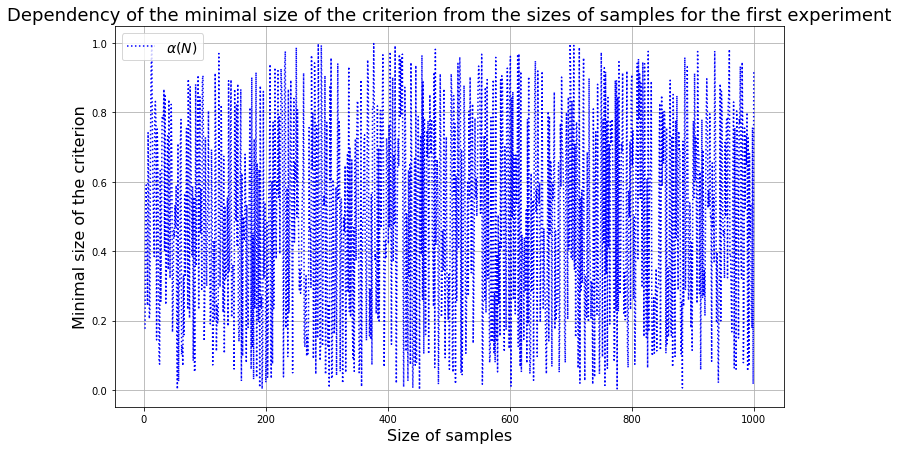

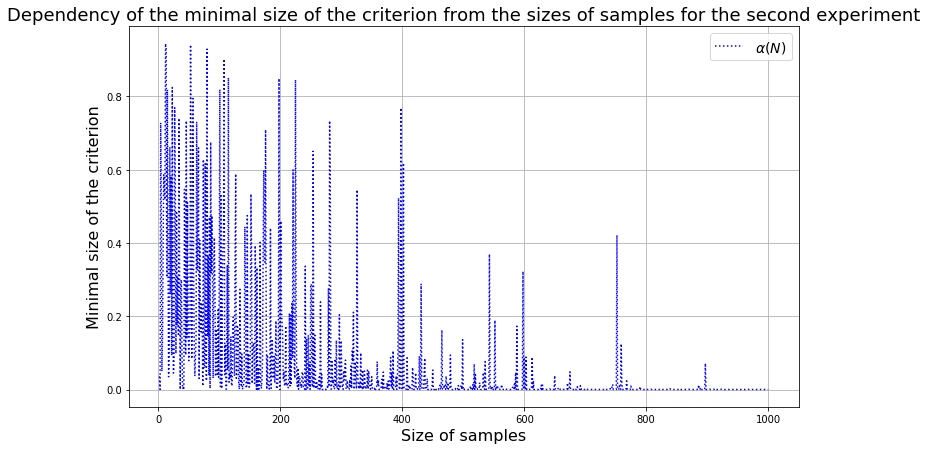

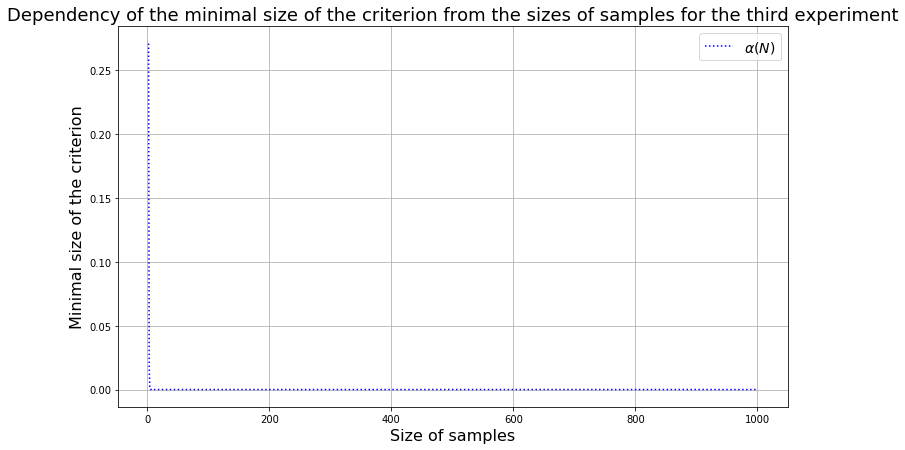

In [19]:
make_alphas_plot(min_alphas_1, 'first')
make_alphas_plot(min_alphas_2, 'second')
make_alphas_plot(min_alphas_3, 'third')

### Выводы

1. При первоначальной проверке построенного критерия были получены результаты, которые согласуются с самими экспериментами. Имеется в виду, что критерий не отвергал гипотезу, когда она была верной, и отвергал, когда она была почти верной и не верной. 
2. Далее, при фиксированных размерах выборок были посчитаны минимальные уровни значимости критериев, при которых отвергается поставленная гипотеза, а также был построен график, на котором были отмечены соответствующие квантили распределения Фишера. Для третьего эксперимента пришлось строить точку, соответствующую левой части в $F$-критерии, так как для любой квантили распределения Фишера гипотеза отвергалась. Полученные значения $\alpha$ и соответствующих квантилей соотносятся с экспериментами.
3. Также не получилось выявить какой-либо зависимости минимального размера критерия от соответствующих (равных) размеров трех выборок для эксперимента, когда верна гипотеза $H_{0}$. Для второго эксперимента видим, что при увеличении размера выборки минимальный уровень значимости сильно падает и становится близким к нулю. Это говорит о том, что левая часть в $F$-критерии становится очень большой. Таким образом, с ростом размера выборки "почти" верность гипотезы становится все более значительной с точки зрения принятия гипотезы $H_{0}$. $\alpha$ для третьего эксперимента почти всегда равен минимальному числу из набора всевозможных $\alpha$, так как условие из $F$-критерия выполняется почти всегда (в смысле $N$) для любой квантили распределения Фишера (гипотеза в этом случае неверна). 